The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.

1. Age: displays the age of the individual.
2. Sex: displays the gender of the individual using the following format : 1 = male 0 = female
3. Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 1 = typical angina 2 = atypical angina 3 = non — anginal pain 4 = asymptotic .
4. Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
7. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)
8. Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
9. Max heart rate achieved : displays the max heart rate achieved by an individual.
10. Exercise induced angina : 1 = yes 0 = no ST depression induced by exercise relative to rest: displays the value which is an integer or float.
11. Peak exercise ST segment : 1 = upsloping 2 = flat 3 = downsloping
12. Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
13. Thal : displays the thalassemia : 3 = normal 6 = fixed defect 7 = reversible defect
14. Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not : 0 = absence 1, 2, 3, 4 = present.

In [44]:
import seaborn as sns 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [45]:
df = pd.read_csv('dataset.csv')

# Data Pre-Processing

In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

THERE IS NO NULL VALUE IN GIVEN DATASET

# Spliting the dataset into a training set (70%) and a test set (30%).

In [47]:
X = df.drop('target',axis=1)
y= df['target']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (212, 13)
Shape of X_test: (91, 13)
Shape of y_train: (212,)
Shape of y_test: (91,)


# Encoding categorical variables and Scaling the numerical features

In [50]:

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

num_pipeline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
            ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder())
    ]
)

preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

# Training a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree.

In [51]:

classifier = RandomForestClassifier(n_estimators=100, max_depth=10)

In [52]:

classifier=RandomForestClassifier()

In [53]:

classifier.fit(X_train, y_train)

RandomForestClassifier()


# Evaluating the performance of the model on the test set using accuracy, precision, recall, and F1 score 

In [54]:
y_pred =classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision_score = precision_score(y_test, y_pred)
print("precision_score:",precision_score)
recall_score = recall_score(y_test, y_pred)
print("recall_score:",recall_score)
f1_score = f1_score(y_test, y_pred)
print("f1_score:",f1_score)
print("Classification Report (Random Search):")
print(classification_report(y_test, y_pred))

Accuracy: 0.8131868131868132
precision_score: 0.8235294117647058
recall_score: 0.84
f1_score: 0.8316831683168315
Classification Report (Random Search):
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



# By Using the feature importance scores identifying the top 5 most important features for predicting heart disease risk

In [80]:
importances = classifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
top_5_features = X.columns[sorted_indices[:5]]
print("Top 5 most important features:")
print(top_5_features)

Top 5 most important features:
Index(['ca', 'thal', 'oldpeak', 'thalach', 'cp'], dtype='object')


# Visualising the feature importances with the help of bar chart.

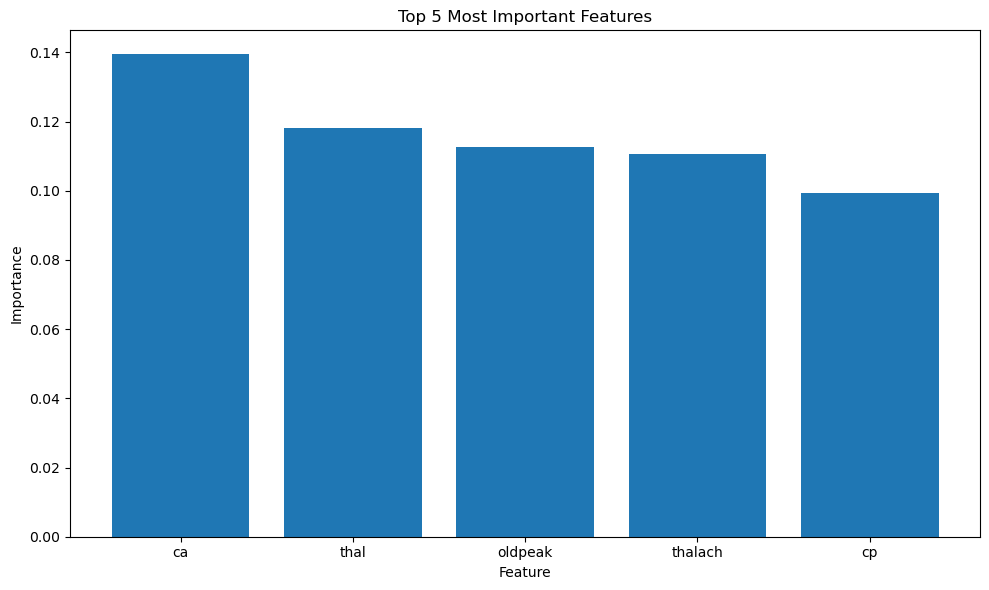

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Most Important Features')
plt.tight_layout()
plt.show()

# Tuning the hyperparameters of the random forest classifier by using random search & puting different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf & Using 5-fold cross-validation to evaluating the performance of each set of hyperparameters.

In [57]:
params={
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.814 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.762 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.905 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.762 total time=   0.3s
[CV 1/5] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.714 total time=   0.1

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy', verbose=3)

In [58]:
y_pred_hyperparameters =cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_hyperparameters)
print("Accuracy:", accuracy)
print("Classification Report (Random Search):")
print(classification_report(y_test, y_pred_hyperparameters))

Accuracy: 0.8241758241758241
Classification Report (Random Search):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



# Reporting the best set of hyperparameters found by the search and the corresponding performance metrics.

In [59]:
cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 15}

In [60]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [61]:
y_pred_hyperparameters_grid =cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_hyperparameters_grid)
print("Accuracy:", accuracy)
print("Classification Report (Random Search):")
print(classification_report(y_test, y_pred_hyperparameters_grid))

Accuracy: 0.8241758241758241
Classification Report (Random Search):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [62]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [73]:
y_pred = cv.predict(X_test)
tuned_random_forest_classifier = grid_search.best_estimator_
tuned_y_pred = tuned_random_forest_classifier.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_y_pred)
print("Tuned Model - Accuracy:", tuned_accuracy)
print("Classification Report (Random Search):")
print(classification_report(y_test, y_pred))

Tuned Model - Accuracy: 0.8021978021978022
Classification Report (Random Search):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


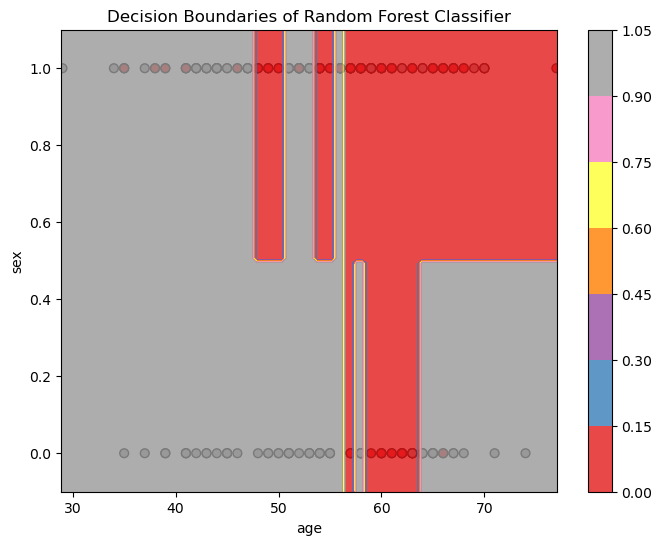

In [74]:
X_subset = X_train.iloc[:, :2]
tuned_rf_classifier.fit(X_subset, y_train)

x_min, x_max = X_subset.iloc[:, 0].min() - 0.1, X_subset.iloc[:, 0].max() + 0.1
y_min, y_max = X_subset.iloc[:, 1].min() - 0.1, X_subset.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Make predictions on the meshgrid
Z = tuned_rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the two most important features
plt.figure(figsize=(8, 6))
plt.scatter(X_subset.iloc[:, 0], X_subset.iloc[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xlabel(X_subset.columns[0])
plt.ylabel(X_subset.columns[1])

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set1)
plt.colorbar()

plt.title("Decision Boundaries of Random Forest Classifier")
plt.show()

## Insights from Decision Boundaries:

1. Non-Linearity: Random forests can handle non-linear relationships between features and the target variable. If the decision boundaries appear to be non-linear, it indicates that the model can capture complex interactions between features, which is beneficial for predicting heart disease risk.
2. Class Separability: Examine how well the decision boundaries separate the data points of different classes. Well-separated boundaries imply a good model performance in distinguishing between the positive and negative cases of heart disease risk.
3. Outliers: Check if the decision boundaries are influenced by outliers. Outliers can have a significant impact on the decision boundaries, especially in regions with sparse data, and understanding how the model handles them is important.
4. Prediction Certainty: Observe areas where the decision boundaries are close to each other. These regions indicate where the model is less certain about its predictions and can be critical for understanding potential misclassifications.

## Limitations:
1. High-Dimensional Data: While decision boundaries can be visualized in 2D with two important features, the model operates in a high-dimensional space. Visualizing decision boundaries in high dimensions becomes impractical, limiting the interpretability of the model.
2. Overfitting: If the random forest model is not properly regularized or hyperparameters are not tuned effectively, it can lead to overfitting. Overfitting may result in overly complex decision boundaries that generalize poorly to new, unseen data.
3. Data Quality: The model's performance heavily relies on the quality and representativeness of the training data. If the data contains biases or is not sufficiently diverse, the model's decision boundaries may not accurately capture the complexities of heart disease risk.
4. Interpretability: Random forests are considered "black-box" models, meaning they lack interpretability at the individual tree level. Understanding the specific reasons behind each prediction may be challenging.
5. Extrapolation: Random forests are generally not well-suited for extrapolation beyond the range of the training data. Predictions for extreme scenarios or unseen data may not be reliable.